## Project: House Price Regression

This project aims to build a linear regression model to predict house prices based on various features. The model is trained and evaluated using a provided dataset.

### Project Structure:

1.  **Data Loading and Preprocessing**: Loads the dataset, handles missing values, and prepares the data for modeling.
2.  **Feature Engineering**: One-hot encodes categorical features and standardizes numerical features.
3.  **Model Training**: Trains a Linear Regression model on the prepared data.
4.  **Evaluation**: Evaluates the model's performance using standard regression metrics (MAE, MSE, RMSE, R²).
5.  **Visualization**: Generates plots to visualize actual vs. predicted prices and the distribution of residuals.

### Requirements:

The following libraries are required to run this notebook:

-   pandas
-   numpy
-   matplotlib
-   seaborn
-   scikit-learn

You can install these libraries using pip:


Regression Performance Report
Mean Absolute Error (MAE) : 8174.58
Mean Squared Error (MSE)  : 101434798.51
Root Mean Squared Error   : 10071.48
R² Score                  : 1.00


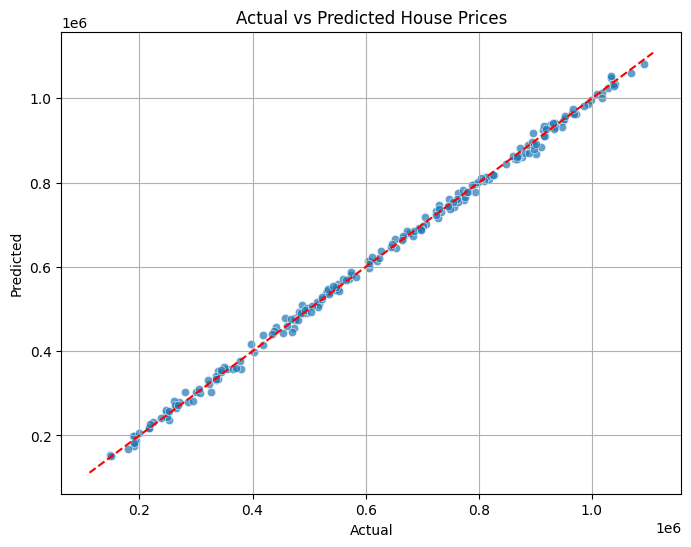

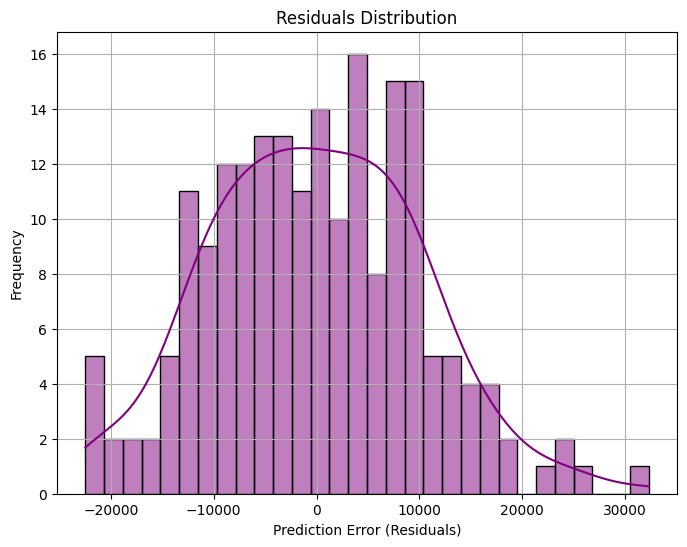

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_csv("house_price_regression_dataset.csv")  # Replace with your file path

# Fill missing values
data.fillna(data.median(), inplace=True)

# Define features and target
X = data.drop(columns=['House_Price'])
y = data['House_Price']

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# === Regression Report ===
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nLinear Regression Performance Report")
print("="*30)
print(f"Mean Absolute Error (MAE) : {mae:.2f}")
print(f"Mean Squared Error (MSE)  : {mse:.2f}")
print(f"Root Mean Squared Error   : {rmse:.2f}")
print(f"R² Score                  : {r2:.2f}")
print("="*30)

# === Plot 1: Actual vs Predicted ===
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title("Actual vs Predicted House Prices")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.show()

# === Plot 2: Residual Distribution ===
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=30, kde=True, color="purple")
plt.title("Residuals Distribution")
plt.xlabel("Prediction Error (Residuals)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
